# Question D12

*Question*: Considering the ML-enabled system projects in which you participated, to which application domains are they related?

*Answer Type*: Multiple Option and Free Field

*Options*: [Banking/Financial, Defense & Security, Education, Embedded systems in Automotive or Avionics,
Entertainment, Healthcare, Insurance, Logistics, Oil & Gas, Sales/E-commerce, Telecommunication, Others]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In this research, we conservatively considered those who fully completed the survey. So, we discarded suspended submissions.

In [3]:
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
domains = {
    'D12_ML_Project_Context_Banking': 'Banking',
    'D12_ML_Project_Context_Defense': 'Defense',
    'D12_ML_Project_Context_Education': 'Education',
    'D12_ML_Project_Context_Embedded': 'Embedded',
    'D12_ML_Project_Context_Entertainment': 'Entertainment',
    'D12_ML_Project_Context_Healthcare': 'Healthcare',
    'D12_ML_Project_Context_Insurance': 'Insurance',
    'D12_ML_Project_Context_Logistics': 'Logistics',
    'D12_ML_Project_Context_Oil': 'Oil',
    'D12_ML_Project_Context_Sales': 'Sales',
    'D12_ML_Project_Context_Telecom': 'Telecom',
    'D12_ML_Project_Context_Others': 'Others'
}

### Basic Analysis

In [5]:
dataframe_obj.df[['D12_ML_Project_Context_Banking', 'D12_ML_Project_Context_Defense', 
                  'D12_ML_Project_Context_Education', 'D12_ML_Project_Context_Embedded', 
                  'D12_ML_Project_Context_Entertainment', 'D12_ML_Project_Context_Healthcare', 
                  'D12_ML_Project_Context_Insurance', 'D12_ML_Project_Context_Logistics',
                  'D12_ML_Project_Context_Oil', 'D12_ML_Project_Context_Sales', 
                  'D12_ML_Project_Context_Telecom', 'D12_ML_Project_Context_Others', 
                  'D12_ML_Project_Context_Others_Free']].head()

,D12_ML_Project_Context_Banking,D12_ML_Project_Context_Defense,D12_ML_Project_Context_Education,D12_ML_Project_Context_Embedded,D12_ML_Project_Context_Entertainment,D12_ML_Project_Context_Healthcare,D12_ML_Project_Context_Insurance,D12_ML_Project_Context_Logistics,D12_ML_Project_Context_Oil,D12_ML_Project_Context_Sales,D12_ML_Project_Context_Telecom,D12_ML_Project_Context_Others,D12_ML_Project_Context_Others_Free
0,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
1,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Human Resources
2,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,quoted,not quoted,not quoted,quoted,Meteorology
3,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,-99
4,quoted,quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted,innovation


In [6]:
indexes = []
values = []
chart_positions = []
for domain in domains:
    indexes.append(domains[domain])
    values.append(dataframe_obj.df[domain].value_counts()['quoted'])
    chart_positions.append(1 if 'Others' not in domain else 0)

In [7]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():
    
    if row['D12_ML_Project_Context_Banking'] == 'quoted' or row['D12_ML_Project_Context_Defense'] == 'quoted' or row['D12_ML_Project_Context_Education'] == 'quoted' or row['D12_ML_Project_Context_Embedded'] == 'quoted' or row['D12_ML_Project_Context_Entertainment'] == 'quoted' or row['D12_ML_Project_Context_Healthcare'] == 'quoted' or row['D12_ML_Project_Context_Insurance'] == 'quoted' or row['D12_ML_Project_Context_Logistics'] == 'quoted' or row['D12_ML_Project_Context_Oil'] == 'quoted' or row['D12_ML_Project_Context_Sales'] == 'quoted' or row['D12_ML_Project_Context_Telecom'] == 'quoted' or row['D12_ML_Project_Context_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)
total_answers_int = total

In [8]:
# plot object
d12_plot = PlotUtils(pd.DataFrame(
    data={'Domain': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

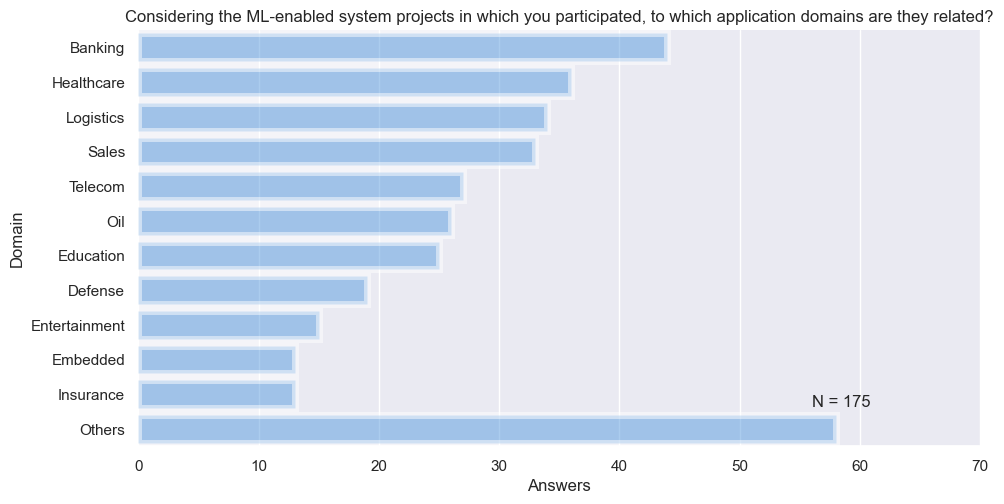

In [9]:
d12_plot.single_barplot(x_axis="Answers", y_axis="Domain",
                       title="Considering the ML-enabled system projects in which you participated, to which application domains are they related?",
                       x_label="Answers", y_label="Domain", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

Let's create an unique wordcloud with what was written in the 'Others' field and the possible options reported in the previous chart.

In [10]:
# remove unnecessary values
domains_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['D12_ML_Project_Context_Others_Free'])))
domains_free = list(filter(lambda a: str(a) != 'nan', domains_free))

In [11]:
raw_domains_words = format_wordcloud_text(texts=domains_free, use_sep=False)

In [12]:
# special case, where in others column we were able to identify all options and group the related into one option
rename_domains_words_dict = {
    'innovation': 'Innovation',
    'Data analysis for autonomous driving': 'Autonomous Driving',
    'Automotive': 'Automotive Industry',
    'Human Resources ': 'Human Resources',
    'Embedded ': 'Embedded',
    'Sistemas de internet das coisas ': 'Internet of Things',
    'mobile apps': 'Mobile Apps',
    'Sport': 'Sports',
    'Sports, Production': 'Sports',
    'SPORTS': 'Sports',
    'Electricity Sector': 'Energy',
    'Smart Grid': 'Energy',
    'Energia imbalance': 'Energy',
    'Energy management': 'Energy',
    'Energy - Electricity Generation': 'Energy',
    'System aimed at information security of companies in general.': 'Information Security',
    'Network security': 'Network Security',
    'Consumer goods industry': 'Consumer Goods Industry',
    'Manufacturing (computer vision for defect detection)': 'Computer Vision',
    'computer vision': 'Computer Vision',
    'Production': 'Manufacturing',
    'Gaming and Marketing': 'Marketing',
    'Ad marketing, ERP, production management': 'Marketing',
    'Advertisement': 'Marketing',
    'Advertising': 'Marketing',
    'Research': 'Research and Development',
    'r&d': 'Research and Development',
    'Fraud prevention': 'Fraud Prevention',
    'Agriculture': 'Agribusiness',
    'Law, Agribusiness': 'Agribusiness',
    'Brand reputation and virtual assistant': 'Virtual Assistants',
    'Government': 'Politics',
    'Kamu Kurumu Projesi': 'Sustainability'
}

In [13]:
domains_words = {}
# pass through raw domains
for key in raw_domains_words:
    # if we have a rename for this domain, let's use its formatted version, otherwise, we use the key
    renamed_key = rename_domains_words_dict.get(key, key)
    # check if we already have added a value or if it is new
    if renamed_key in domains_words:
        domains_words[renamed_key] += raw_domains_words[key]
    else:
        domains_words[renamed_key] = raw_domains_words[key]

In [14]:
# including the closed options
for index, value in zip(indexes, values):
    if 'Others' not in index:
        domains_words[index] = value

In [15]:
# plot object
d12_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(domains_words.keys()), 'Weight': list(domains_words.values())}
))

In [16]:
d12_wc_plot.df.sort_values(by='Weight', ascending=False)

,Word,Weight
28,Banking,44
33,Healthcare,36
35,Logistics,34
37,Sales,33
38,Telecom,27
36,Oil,26
30,Education,25
29,Defense,19
32,Entertainment,15
31,Embedded,13


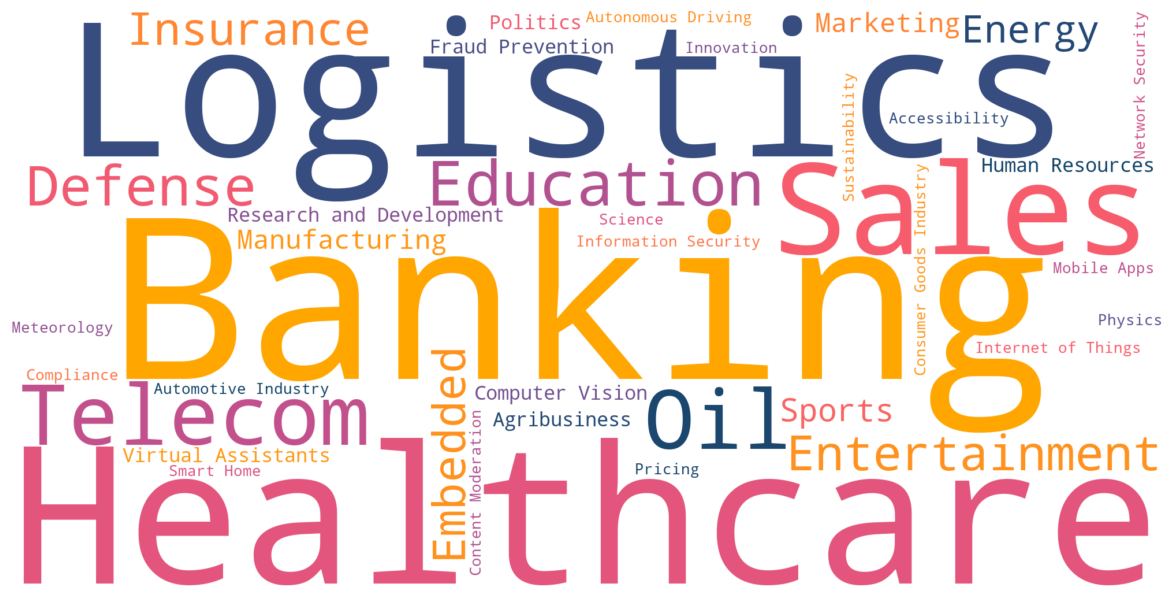

In [17]:
d12_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [18]:
prefix = "D12_ML_Project_Context_"

In [19]:
# the possible answers are the ones in columns
valid_options_list = [domain_column.split(prefix)[1] for domain_column in domains]

In [20]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    valid_answers_list.append(answer)

In [21]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [22]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [23]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [24]:
# plot object for bootstrapped data
d12_boot_plot = PlotUtils(pd.DataFrame(
    data={'Domain': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

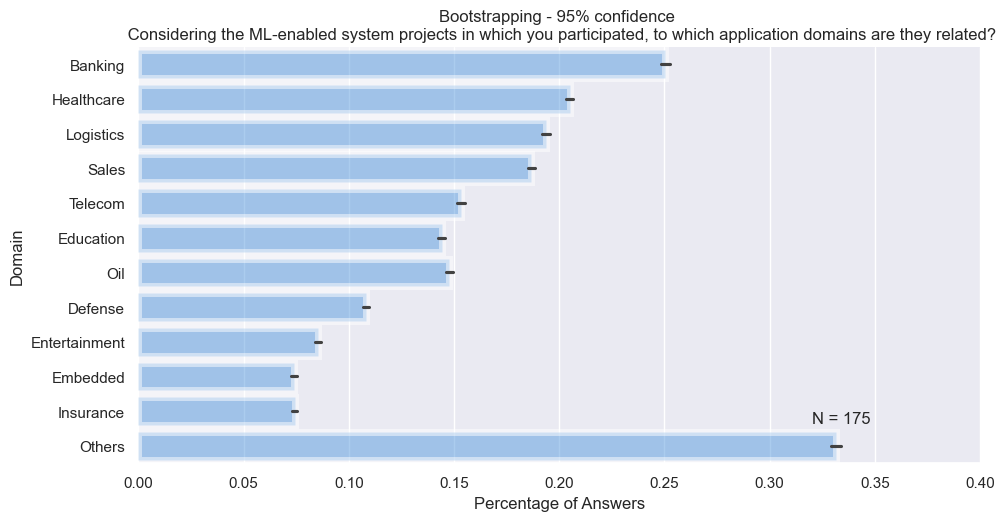

In [25]:
d12_boot_plot.single_barplot(x_axis="Value", y_axis="Domain", 
                       title="Bootstrapping - 95% confidence \n Considering the ML-enabled system projects in which you participated, to which application domains are they related?",
                       x_label="Percentage of Answers", y_label="Domain", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [26]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Banking:(0.24831277980073108, 0.2504914285714286, 0.2526700773421261)
Defense:(0.10649475013196599, 0.10801714285714287, 0.10953953558231974)
Education:(0.1423646425226944, 0.14405142857142858, 0.14573821462016276)
Embedded:(0.07272182012011862, 0.07396, 0.07519817987988138)
Entertainment:(0.08415316005114683, 0.08547428571428571, 0.0867954113774246)
Healthcare:(0.20308293784090442, 0.20502285714285712, 0.20696277644480982)
Insurance:(0.07313495971139099, 0.07436571428571428, 0.07559646886003758)
Logistics:(0.19192201404389678, 0.19371428571428576, 0.19550655738467473)
Oil:(0.14595568230028172, 0.14765714285714285, 0.14935860341400398)
Sales:(0.1848407497736387, 0.1867142857142857, 0.18858782165493268)
Telecom:(0.15160691657238884, 0.15345142857142857, 0.1552959405704683)
Others:(0.3292805070679247, 0.3316285714285714, 0.33397663578921805)


In [27]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Banking:: P = 25.049 [24.831, 25.267]
Defense:: P = 10.802 [10.649, 10.954]
Education:: P = 14.405 [14.236, 14.574]
Embedded:: P = 7.396 [7.272, 7.52]
Entertainment:: P = 8.547 [8.415, 8.68]
Healthcare:: P = 20.502 [20.308, 20.696]
Insurance:: P = 7.437 [7.313, 7.56]
Logistics:: P = 19.371 [19.192, 19.551]
Oil:: P = 14.766 [14.596, 14.936]
Sales:: P = 18.671 [18.484, 18.859]
Telecom:: P = 15.345 [15.161, 15.53]
Others:: P = 33.163 [32.928, 33.398]
